In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [10]:
num_arms = 10  # Number of arms (bandit actions)
num_problems = 2000  # Number of problems/scenarios

# Generate true action values for each arm in each problem
true_action_values = np.random.normal(0, 1, (num_problems, num_arms))

# Initialize an array to hold arm samples
arm_samples = [0] * num_arms

# Generate samples for each arm based on the true action values
for i in range(num_arms):
    arm_samples[i] = np.random.normal(true_action_values[0, i], 1, 2000)  # Samples for the first problem

In [11]:
# Define a bandit function that returns a reward for a given action and problem
def bandit(action, problem):
    return np.random.normal(true_action_values[problem, action], 1)

In [12]:
# Define a function for selecting the action with the maximum estimated value
def epsilon_greedy_max(Q_values, action_counts, time_step):
    return np.random.choice(np.flatnonzero(Q_values == Q_values.max()))  # Breaking ties randomly

In [13]:
# Define a function for performing the simple bandit algorithm
def run_bandit_experiment(num_arms, epsilon, num_steps, initial_values, alpha=0, action_selection_func=epsilon_greedy_max):
    average_rewards = np.zeros(num_steps)
    optimal_action_rates = np.zeros(num_steps)

    for i in tqdm(range(num_problems)):
        Q_values = np.ones(num_arms) * initial_values  # Initialize estimated action values
        action_counts = np.zeros(num_arms)  # Initialize action counters
        best_action = np.argmax(true_action_values[i])  # Find the best action for the current problem

        for t in range(num_steps):
            if np.random.rand() < epsilon:  # Explore
                selected_action = np.random.randint(num_arms)
            else:  # Exploit
                selected_action = action_selection_func(Q_values, action_counts, t)

            reward = bandit(selected_action, i)  # Get the reward for the selected action

            action_counts[selected_action] += 1  # Increment the action counter for the selected action

            if alpha > 0:
                Q_values[selected_action] = Q_values[selected_action] + (reward - Q_values[selected_action]) * alpha  # Update action value with a step size (alpha)
            else:
                Q_values[selected_action] = Q_values[selected_action] + (reward - Q_values[selected_action]) / action_counts[selected_action]  # Update action value incrementally

            average_rewards[t] += reward  # Accumulate rewards over time

            if selected_action == best_action:
                optimal_action_rates[t] += 1  # Count the number of times the best action is chosen

    # Return the average rewards and optimal action rates
    return np.divide(average_rewards, num_problems), np.divide(optimal_action_rates, num_problems)

In [14]:
# Define a function for selecting actions using the Upper Confidence Bound (UCB) algorithm
def ucb_action_selection(Q_values, action_counts, time_step):
    exploration_param = 2  # UCB exploration parameter
    if action_counts.min() == 0:
        return np.random.choice(np.flatnonzero(action_counts == action_counts.min()))  # Choose an unvisited action if any

    ucb_values = Q_values + exploration_param * np.sqrt(np.divide(np.log(time_step), action_counts))  # UCB action selection rule
    return np.argmax(ucb_values)  # Breaking ties randomly

  0%|          | 0/2000 [00:00<?, ?it/s]

100%|██████████| 2000/2000 [00:32<00:00, 61.77it/s]


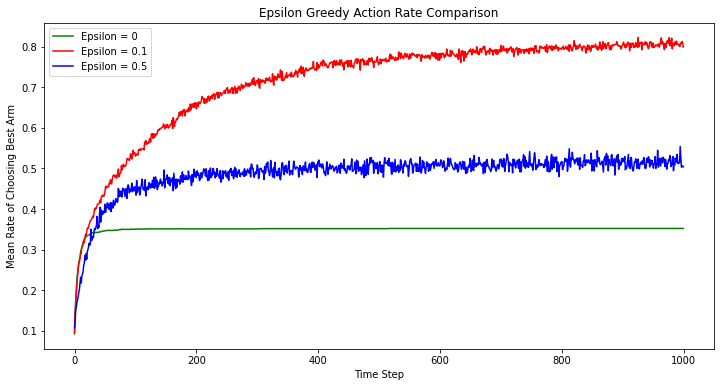

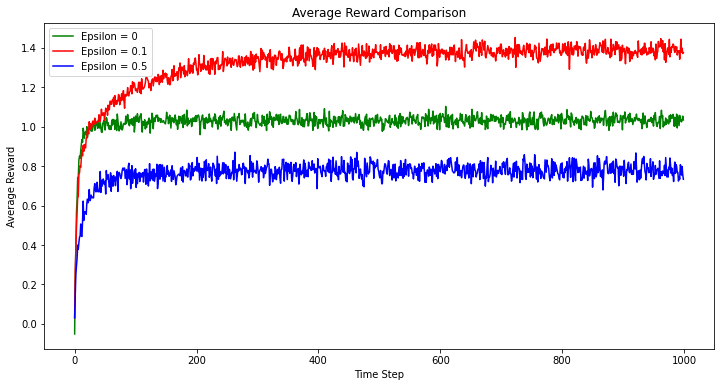

In [15]:
 # Run experiments with different epsilon values using the run_bandit_experiment function
epsilon_0_rewards, epsilon_0_optimal = run_bandit_experiment(num_arms=10, epsilon=0, num_steps=1000, initial_values=0)
epsilon_0_01_rewards, epsilon_0_01_optimal = run_bandit_experiment(num_arms=10, epsilon=0.1, num_steps=1000, initial_values=0)
epsilon_0_1_rewards, epsilon_0_1_optimal = run_bandit_experiment(num_arms=10, epsilon=0.5, num_steps=1000, initial_values=0)

# Create a plot for comparing optimal action rates
plt.figure(figsize=(12, 6))
plt.yticks(np.arange(0, 1, 0.1))
plt.plot(epsilon_0_optimal, 'g', label='Epsilon = 0')
plt.plot(epsilon_0_01_optimal, 'r', label='Epsilon = 0.1')
plt.plot(epsilon_0_1_optimal, 'b', label='Epsilon = 0.5')
plt.legend()
plt.title("Epsilon Greedy Action Rate Comparison")
plt.xlabel("Time Step")
plt.ylabel("Mean Rate of Choosing Best Arm")
plt.show()
print()
# Create a plot for comparing average rewards
plt.figure(figsize=(12, 6))
plt.plot(epsilon_0_rewards, 'g', label='Epsilon = 0')
plt.plot(epsilon_0_01_rewards, 'r', label='Epsilon = 0.1')
plt.plot(epsilon_0_1_rewards, 'b', label='Epsilon = 0.5')
plt.legend()
plt.title("Average Reward Comparison")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.show()
print()

100%|██████████| 2000/2000 [00:30<00:00, 66.40it/s]


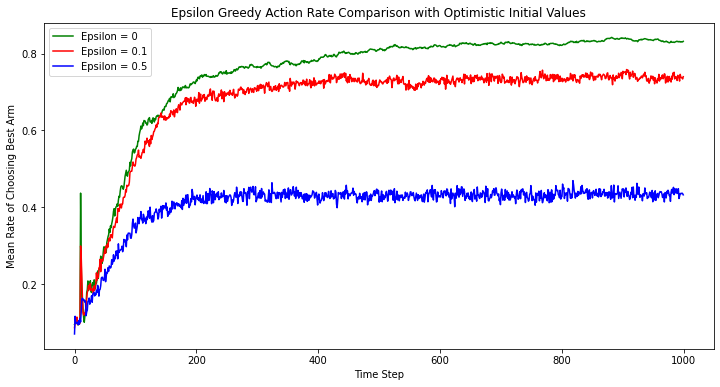

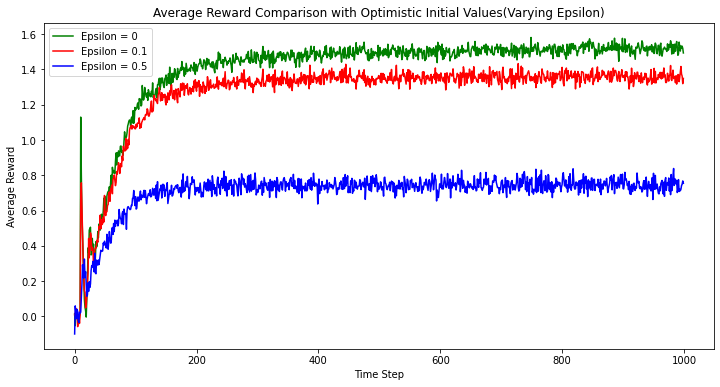

In [16]:
# Run experiments with optimistic initial values for different epsilon
optimistic_0_rewards, optimistic_0_optimal = run_bandit_experiment(num_arms=10, epsilon=0, num_steps=1000, initial_values=5, alpha=0.2)
optimistic_0_01_rewards, optimistic_0_01_optimal = run_bandit_experiment(num_arms=10, epsilon=0.1, num_steps=1000, initial_values=5, alpha=0.2)
optimistic_0_1_rewards, optimistic_0_1_optimal = run_bandit_experiment(num_arms=10, epsilon=0.5, num_steps=1000, initial_values=5, alpha=0.2)

# Create a plot for comparing optimal action rates with optimistic initial values
plt.figure(figsize=(12, 6))
plt.yticks(np.arange(0, 3, 0.2))
plt.plot(optimistic_0_optimal, 'g', label='Epsilon = 0')
plt.plot(optimistic_0_01_optimal, 'r', label='Epsilon = 0.1')
plt.plot(optimistic_0_1_optimal, 'b', label='Epsilon = 0.5')
plt.legend()
plt.title("Epsilon Greedy Action Rate Comparison with Optimistic Initial Values")
plt.xlabel("Time Step")
plt.ylabel("Mean Rate of Choosing Best Arm")
plt.show()
print()
# Create a plot for comparing average rewards with optimistic initial values
plt.figure(figsize=(12, 6))
plt.yticks(np.arange(0, 3, 0.2))
plt.plot(optimistic_0_rewards, 'g', label='Epsilon = 0')
plt.plot(optimistic_0_01_rewards, 'r', label='Epsilon = 0.1')
plt.plot(optimistic_0_1_rewards, 'b', label='Epsilon = 0.5')
plt.legend()
plt.title("Average Reward Comparison with Optimistic Initial Values(Varying Epsilon)")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.show()
print()

100%|██████████| 2000/2000 [00:43<00:00, 45.97it/s]


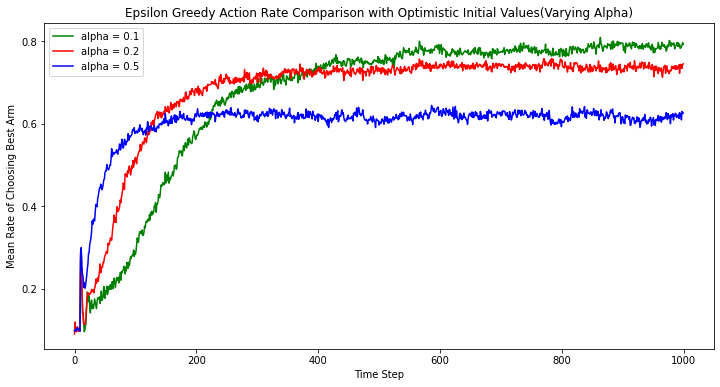

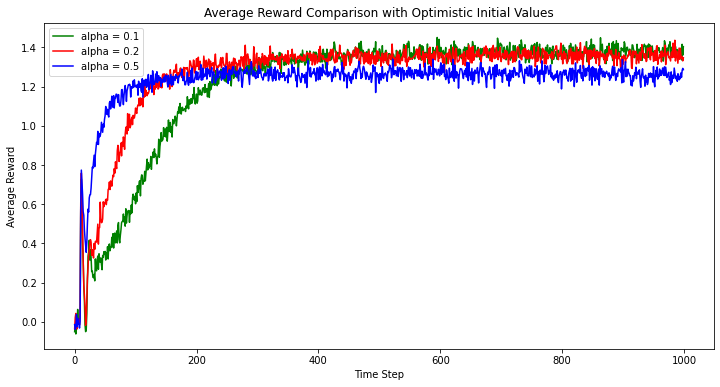

In [17]:
# Run experiments with optimistic initial values for a different alpha
optimistic_0_rewards, optimistic_0_optimal = run_bandit_experiment(num_arms=10, epsilon=0.1, num_steps=1000, initial_values=5, alpha=0.1)
optimistic_0_01_rewards, optimistic_0_01_optimal = run_bandit_experiment(num_arms=10, epsilon=0.1, num_steps=1000, initial_values=5, alpha=0.2)
optimistic_0_1_rewards, optimistic_0_1_optimal = run_bandit_experiment(num_arms=10, epsilon=0.1, num_steps=1000, initial_values=5, alpha=0.5)

# Create a plot for comparing optimal action rates with optimistic initial values
plt.figure(figsize=(12, 6))
plt.yticks(np.arange(0, 3, 0.2))
plt.plot(optimistic_0_optimal, 'g', label='alpha = 0.1')
plt.plot(optimistic_0_01_optimal, 'r', label='alpha = 0.2')
plt.plot(optimistic_0_1_optimal, 'b', label='alpha = 0.5')
plt.legend()
plt.title("Epsilon Greedy Action Rate Comparison with Optimistic Initial Values(Varying Alpha)")
plt.xlabel("Time Step")
plt.ylabel("Mean Rate of Choosing Best Arm")
plt.show()
print()
# Create a plot for comparing average rewards with optimistic initial values
plt.figure(figsize=(12, 6))
plt.yticks(np.arange(0, 3, 0.2))
plt.plot(optimistic_0_rewards, 'g', label='alpha = 0.1')
plt.plot(optimistic_0_01_rewards, 'r', label='alpha = 0.2')
plt.plot(optimistic_0_1_rewards, 'b', label='alpha = 0.5')
plt.legend()
plt.title("Average Reward Comparison with Optimistic Initial Values")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.show()
print()

100%|██████████| 2000/2000 [00:27<00:00, 71.68it/s]


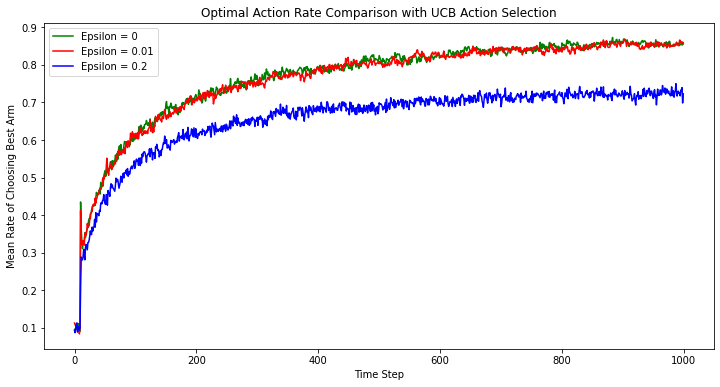

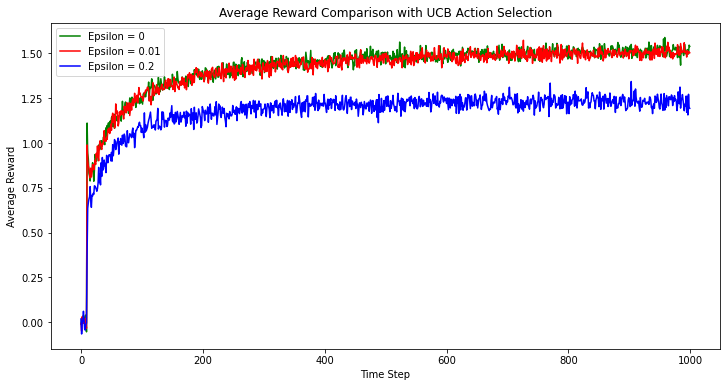

In [18]:
# Run experiments with UCB action selection
ucb_0_rewards, ucb_0_optimal = run_bandit_experiment(num_arms=10, epsilon=0, num_steps=1000, initial_values=0, action_selection_func=ucb_action_selection)
ucb_0_01_rewards, ucb_0_01_optimal = run_bandit_experiment(num_arms=10, epsilon=0.01, num_steps=1000, initial_values=0, action_selection_func=ucb_action_selection)
ucb_0_1_rewards, ucb_0_1_optimal = run_bandit_experiment(num_arms=10, epsilon=0.2, num_steps=1000, initial_values=0, action_selection_func=ucb_action_selection)

# Create a plot for comparing optimal action rates with UCB action selection
plt.figure(figsize=(12, 6))
plt.plot(ucb_0_optimal, 'g', label='Epsilon = 0')
plt.plot(ucb_0_01_optimal, 'r', label='Epsilon = 0.01')
plt.plot(ucb_0_1_optimal, 'b', label='Epsilon = 0.2')
plt.legend()
plt.title("Optimal Action Rate Comparison with UCB Action Selection")
plt.xlabel("Time Step")
plt.ylabel("Mean Rate of Choosing Best Arm")
plt.show()
print()
# Create a plot for comparing average rewards with UCB action selection
plt.figure(figsize=(12, 6))
plt.plot(ucb_0_rewards, 'g', label='Epsilon = 0')
plt.plot(ucb_0_01_rewards, 'r', label='Epsilon = 0.01')
plt.plot(ucb_0_1_rewards, 'b', label='Epsilon = 0.2')
plt.legend()
plt.title("Average Reward Comparison with UCB Action Selection")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.show()
print()

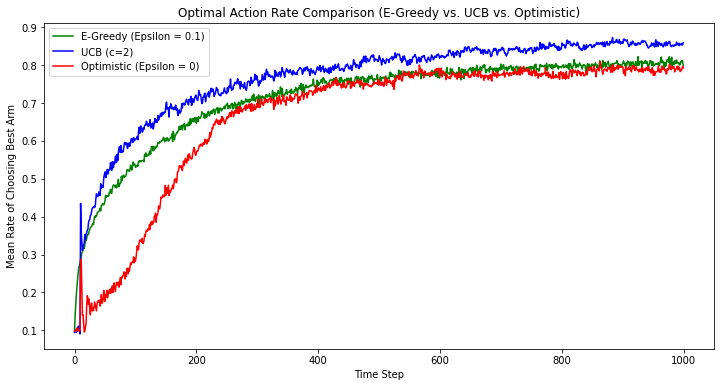

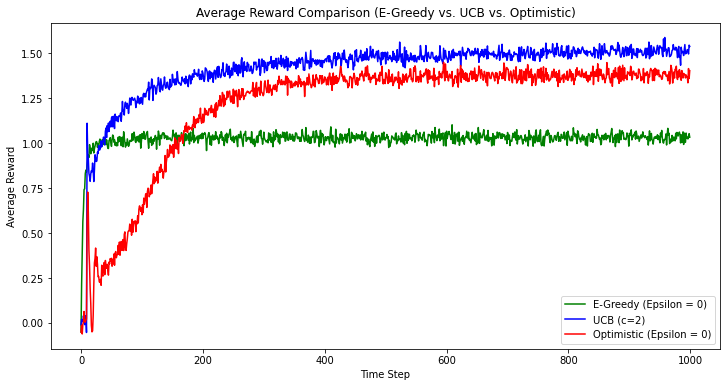

In [19]:
# Create a plot for comparing optimal action rates between different action selection methods
plt.figure(figsize=(12, 6))
plt.plot(epsilon_0_01_optimal, 'g', label='E-Greedy (Epsilon = 0.1)')
plt.plot(ucb_0_optimal, 'b', label='UCB (c=2)')
plt.plot(optimistic_0_optimal, 'r', label='Optimistic (Epsilon = 0)')
plt.legend()
plt.title("Optimal Action Rate Comparison (E-Greedy vs. UCB vs. Optimistic)")
plt.xlabel("Time Step")
plt.ylabel("Mean Rate of Choosing Best Arm")
plt.show()
print()
# Create a plot for comparing average rewards between different action selection methods
plt.figure(figsize=(12, 6))
plt.plot(epsilon_0_rewards, 'g', label='E-Greedy (Epsilon = 0)')
plt.plot(ucb_0_rewards, 'b', label='UCB (c=2)')
plt.plot(optimistic_0_rewards, 'r', label='Optimistic (Epsilon = 0)')
plt.legend()
plt.title("Average Reward Comparison (E-Greedy vs. UCB vs. Optimistic)")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.show()
print()